# Tableau Prep EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [4]:
df1 = pd.read_csv('/Users/valentinereltien/Desktop/IRENA/Energy_df.csv')

## Renaming columns:

In [37]:
df1.columns

df1.rename(columns = {'GDP growth (annual %)': 'gdp_g_anpc', 'Adjusted savings: gross savings (% of GNI)': 'AdjSav_pcGNI',
                     'GNI growth (annual %)': 'gni_g_anpc', 'Adjusted savings: energy depletion (current US$)': 'AdjSav_Engdep_usd',
                     'Adjusted savings: carbon dioxide damage (current US$)': 'AdjSav_CO2dmg_usd',
                      'Adjusted savings: particulate emission damage (% of GNI)': 'AdjSav_Ptcldmg_pcGNI', 
                     'Investment in energy with private participation (current US$)':'Pvt_inv_usd',
                     'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemp_pcLF', 
                     'CO2 emissions (metric tons per capita)': 'CO2ems_mTpCpt'}, inplace=True)

In [61]:
df1.to_csv('Energy_df2.csv', index=False)

In [43]:
df1.columns

Index(['Country', 'Project', 'Date', 'Investor', 'Technology', 'Asset Class',
       'Invested_USDM', 'Source', 'gdp_g_anpc', 'AdjSav_pcGNI', 'gni_g_anpc',
       'AdjSav_Engdep_usd', 'AdjSav_CO2dmg_usd', 'AdjSav_Ptcldmg_pcGNI',
       'Pvt_inv_usd', 'Unemp_pcLF', 'CO2ems_mTpCpt'],
      dtype='object')

Transforming column values to coincide w/ Invested USDM, express in millions of $

In [48]:
df1.Pvt_inv_usd = df1.Pvt_inv_usd.apply(lambda x : x/1000000)

In [49]:
df1.rename(columns = {'Pvt_inv_usd' : 'Pvt_inv_USDM'}, inplace=True)

In [60]:
df1.groupby('Country')['Pvt_inv_USDM', 'Invested_USDM'].sum().sort_values(by = 'Pvt_inv_USDM', ascending=False)[:10]

,Pvt_inv_USDM
Country,
Brazil,1.038451e+07
India,3.178379e+06
China,5.733293e+05
Indonesia,4.691509e+05
Turkey,4.619574e+05
Mexico,2.317209e+05
South Africa,1.917479e+05
Pakistan,1.552310e+05
Peru,1.391153e+05


## Visualization attempt:

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a1fae5440> (for post_execute):


KeyboardInterrupt: 

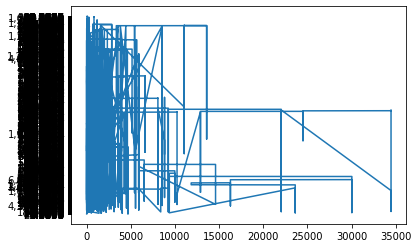

In [51]:
plt.plot(df1.Pvt_inv_USDM, df1.Invested_USDM)

In [44]:
#  sns.factorplot(x="gni_g_anpc"
#  y="survived",
#  hue="sex",
                
g = sns.FacetGrid(df1, col="Invested_USDM",  hue="Technology")
# g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w")
#       .add_legend())

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a1fae5440> (for post_execute):


ValueError: Image size of 1067040x216 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1067040x216 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1.06704e+06x216 with 3015 Axes>

Creating a log scale to clarify distribution of investment on lesser scale (circa <= $7 million)

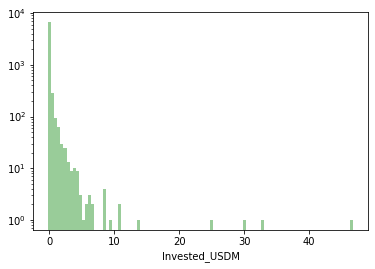

In [41]:
sns.distplot(dfs.Invested_USDM, kde=False, color = 'g', bins=100)
plt.yscale('log')

## Engineering to boost visualizations 

In [6]:
scaler = StandardScaler()
dfs = df1.iloc[:,6:]
dfs.dtypes
dfs.drop('Source', axis=1, inplace=True)

In [7]:
type(dfs.iloc[:,0][0])

str

In [8]:
dfs.iloc[:,0]

0       22.6498
1        0.2698
2        1.9594
3        5.9994
4        0.1376
         ...   
7173     0.0078
7174     0.0100
7175     5.7101
7176     0.0051
7177     0.0096
Name: Invested_USDM, Length: 7178, dtype: object

In [9]:
dfs.Invested_USDM = dfs.iloc[:,0].apply(lambda x: x.replace(',',''))

In [10]:
dfs.Invested_USDM = dfs.Invested_USDM.apply(lambda x: float(x))

In [11]:
dfs.dtypes

Invested_USDM                                                          float64
GDP growth (annual %)                                                  float64
Adjusted savings: gross savings (% of GNI)                             float64
GNI growth (annual %)                                                  float64
Adjusted savings: energy depletion (current US$)                       float64
Adjusted savings: carbon dioxide damage (current US$)                  float64
Adjusted savings: particulate emission damage (% of GNI)               float64
Investment in energy with private participation (current US$)          float64
Unemployment, total (% of total labor force) (modeled ILO estimate)    float64
CO2 emissions (metric tons per capita)                                 float64
dtype: object

In [30]:
dfs.columns

dfs.rename(columns = {'GDP growth (annual %)': 'gdp_g_anpc', 'Adjusted savings: gross savings (% of GNI)': 'AdjSav_pcGNI',
                     'GNI growth (annual %)': 'gni_g_anpc', 'Adjusted savings: energy depletion (current US$)': 'AdjSav_Engdep_usd',
                     'Adjusted savings: carbon dioxide damage (current US$)': 'AdjSav_CO2dmg_usd',
                      'Adjusted savings: particulate emission damage (% of GNI)': 'AdjSav_Ptcldmg_pcGNI', 
                     'Investment in energy with private participation (current US$)':'Pvt_inv_usd',
                     'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemp_pcLF', 
                     'CO2 emissions (metric tons per capita)': 'CO2ems_mTpCpt'}, inplace=True)

In [12]:
#Scaled & cleaned values to plot them:
dfs = pd.DataFrame(scaler.fit_transform(dfs), columns = dfs.columns)

In [13]:
dfs.head()

,Invested_USDM,GDP growth (annual %),Adjusted savings: gross savings (% of GNI),GNI growth (annual %),Adjusted savings: energy depletion (current US$),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: particulate emission damage (% of GNI),Investment in energy with private participation (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",CO2 emissions (metric tons per capita)
0,-0.024510,1.207700,NaN,NaN,-0.413558,-0.293794,NaN,-0.615008,0.889585,-0.889039
1,-0.178782,1.207700,NaN,NaN,-0.413558,-0.293794,NaN,-0.615008,0.889585,-0.889039
2,-0.167135,1.207700,NaN,NaN,-0.413558,-0.293794,NaN,-0.615008,0.889585,-0.889039
3,-0.139286,1.849894,NaN,NaN,-0.413533,-0.293689,NaN,NaN,0.856287,-0.888501
4,-0.179693,1.849894,NaN,NaN,-0.413533,-0.293689,NaN,NaN,0.856287,-0.888501


## Visualizations 2: Pairplots & Heatmaps 

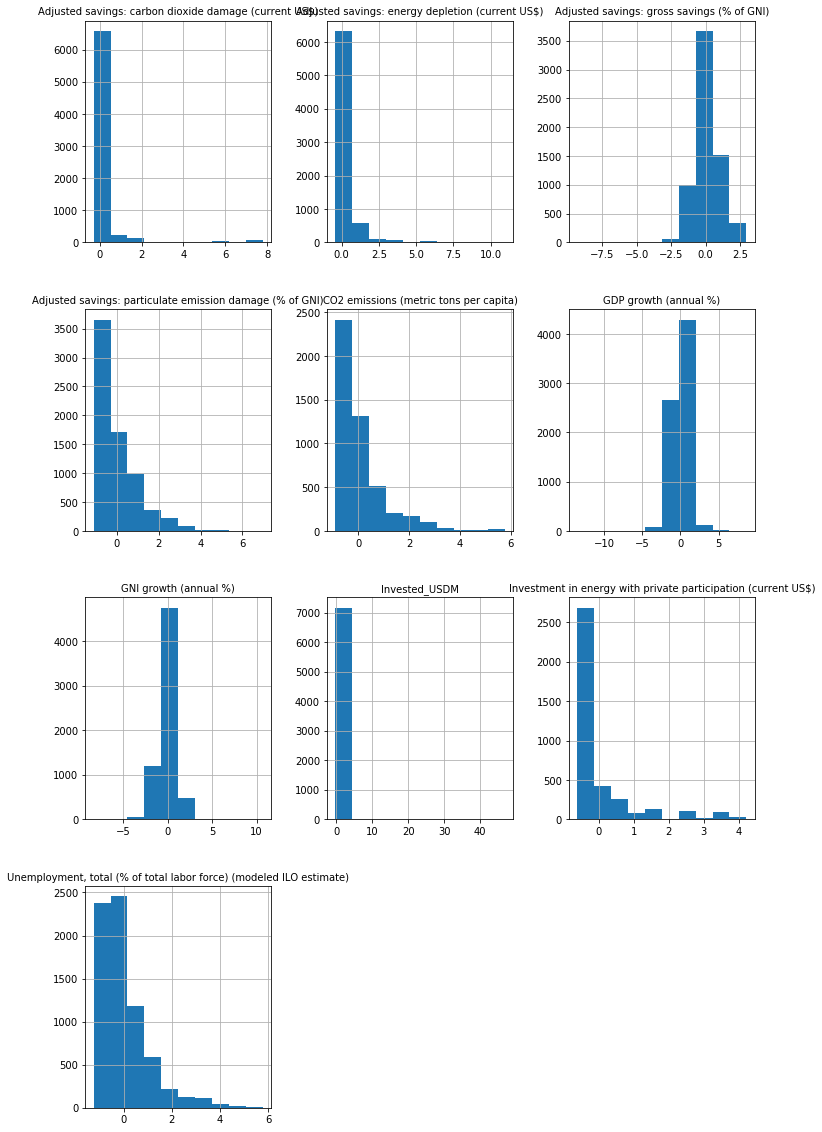

In [14]:
axes = pd.DataFrame(dfs, columns=dfs.columns).hist(figsize=(12,20)
                                                   #, sharex=True, sharey=True
                                                  )
for ax in axes:
    for a in ax:
        a.set_title(a.get_title(), fontsize=10
                    #, pad = 2
                   )
plt.show()

In [15]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
dfs_pt = pd.DataFrame(pt.fit_transform(dfs), columns = dfs.columns)


In [40]:
df1.Project.head(1)

0    afghanistan: emergency national solidarity pro...
Name: Project, dtype: object

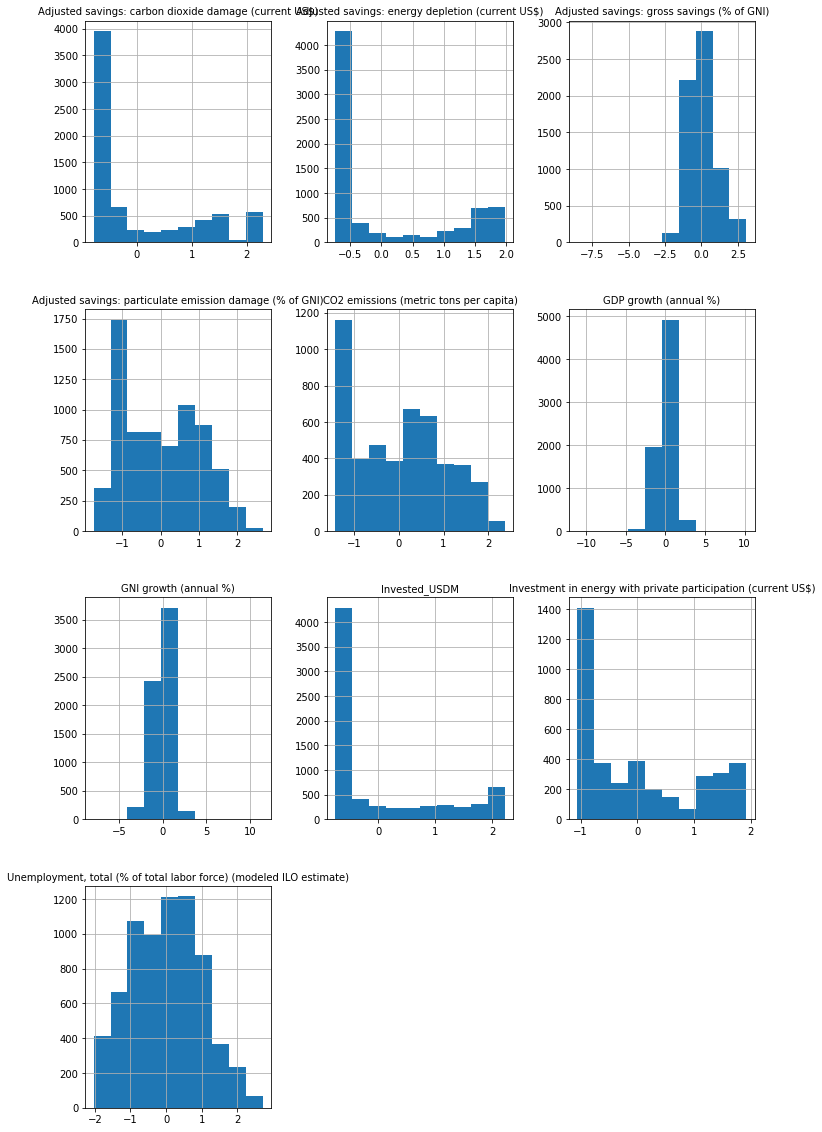

In [60]:
axes = pd.DataFrame(dfs_pt, columns=dfs.columns).hist(figsize=(12,20)
                                                   #, sharex=True, sharey=True
                                                  )
for ax in axes:
    for a in ax:
        a.set_title(a.get_title(), fontsize=10
                    #, pad = 2
                   )
plt.show()

/Users/valentinereltien/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/valentinereltien/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/valentinereltien/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/valentinereltien/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/valentinereltien/opt/anaconda3/lib/python3.7/site-p

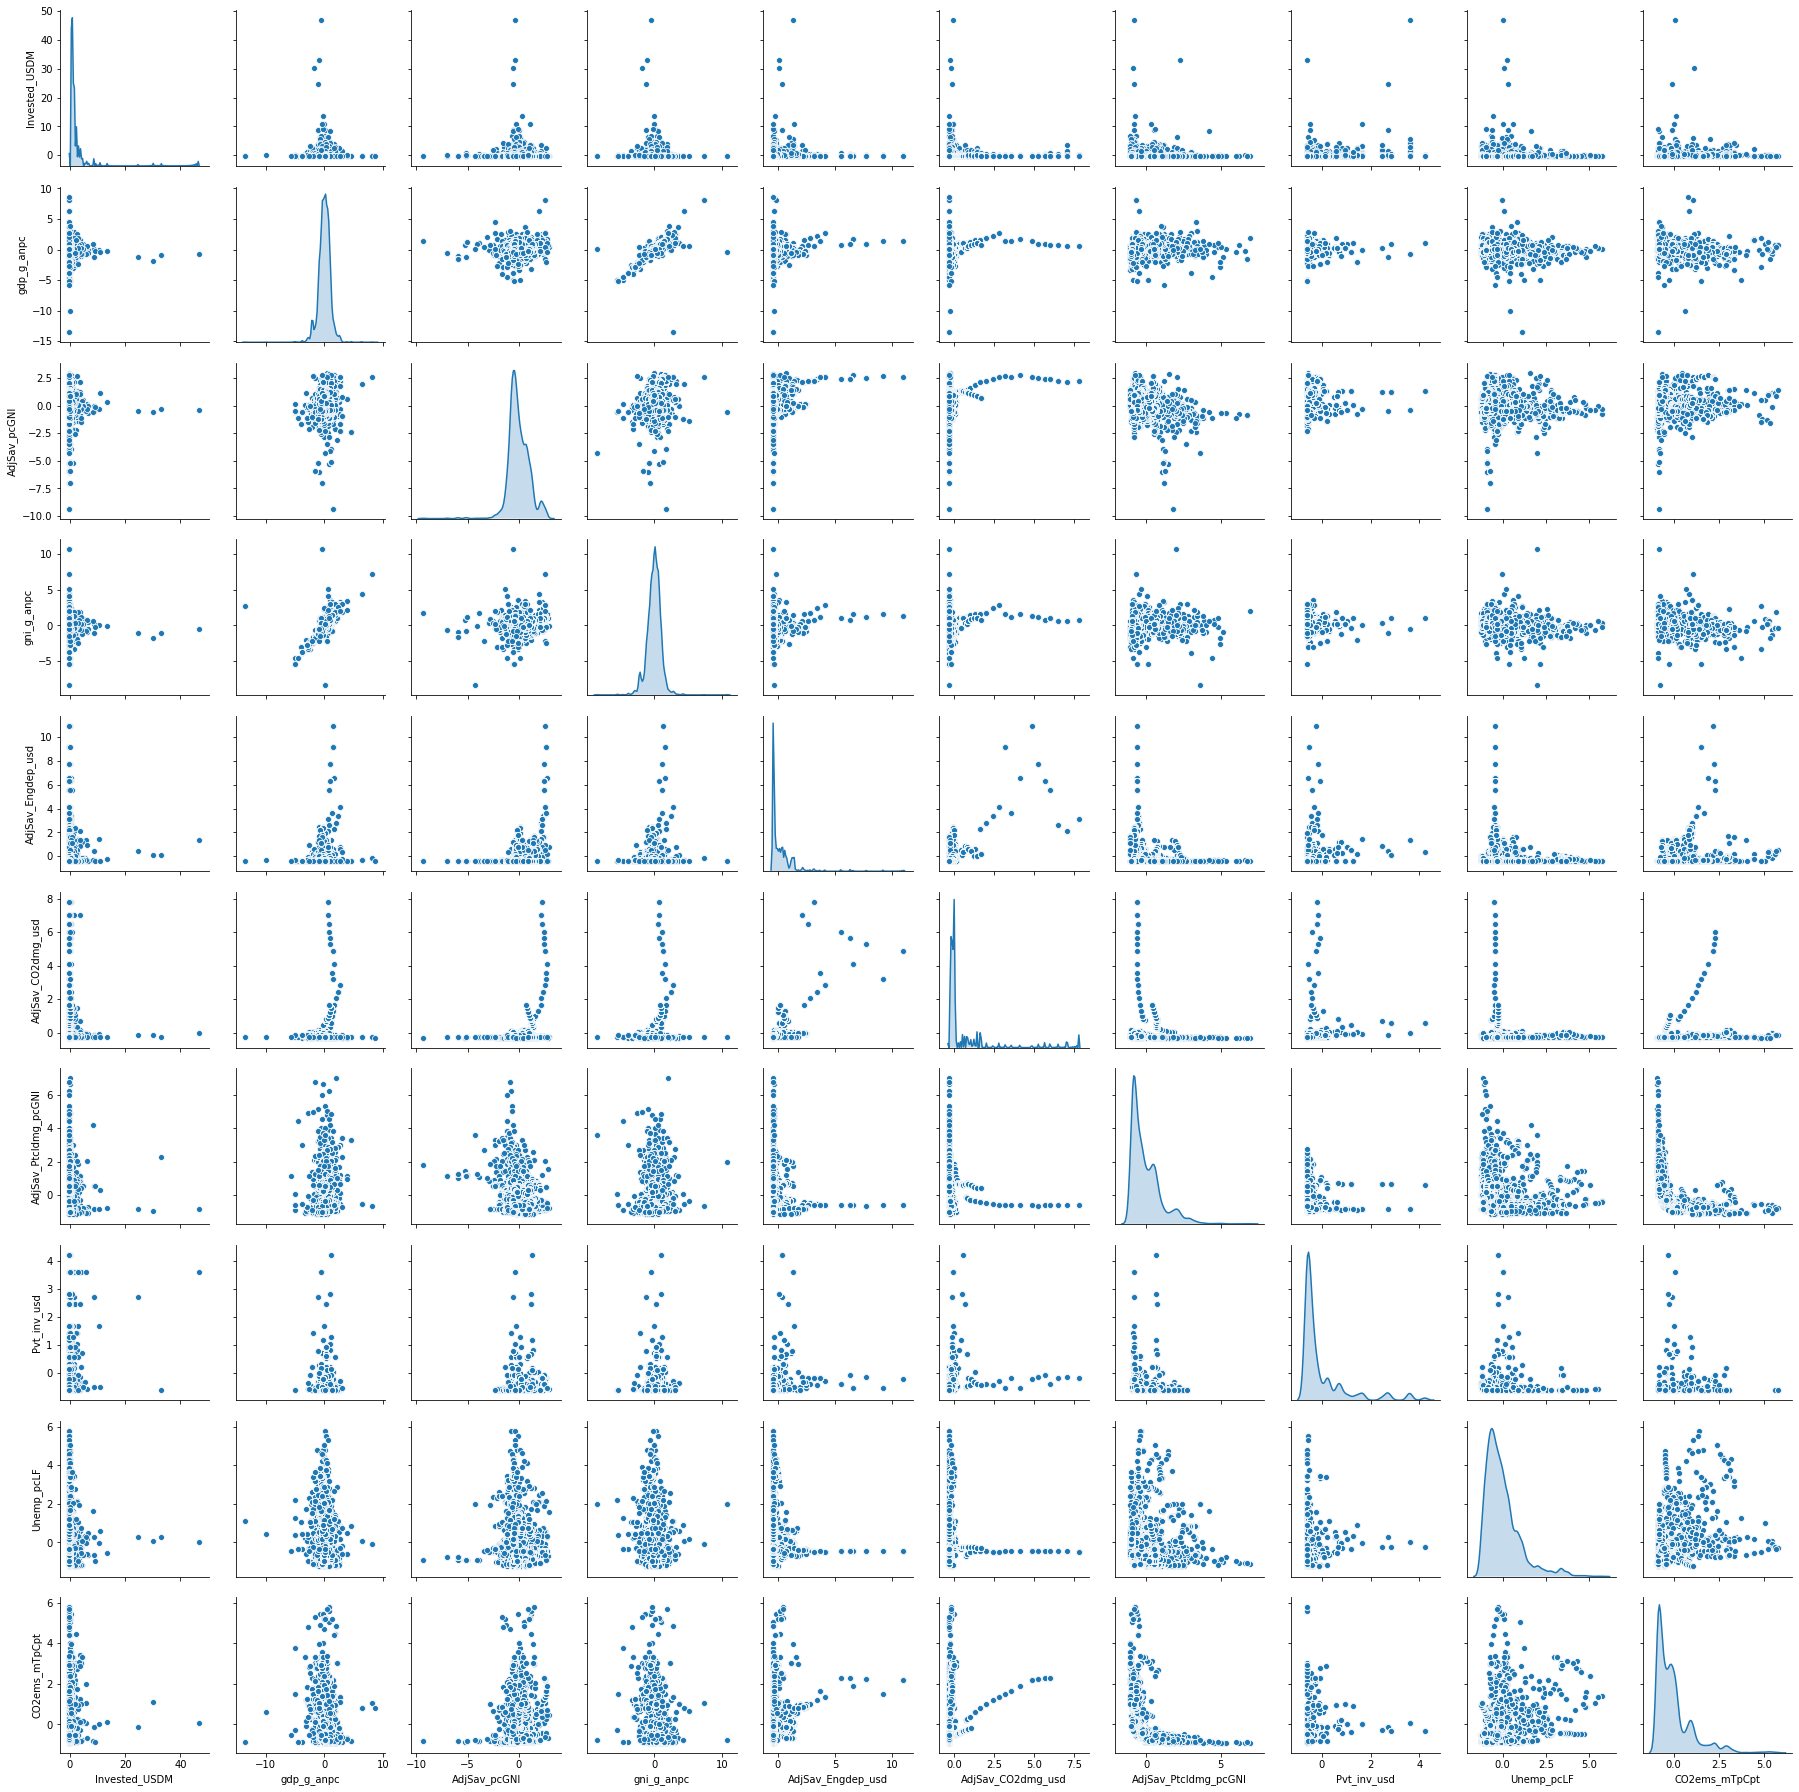

In [31]:
g = sns.pairplot(dfs,  
             #hue='iris', 
             diag_kind='kde') 
plt.show()
savefig(g, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [42]:
dfs.corr()

,Invested_USDM,GDP growth (annual %),Adjusted savings: gross savings (% of GNI),GNI growth (annual %),Adjusted savings: energy depletion (current US$),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: particulate emission damage (% of GNI),Investment in energy with private participation (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",CO2 emissions (metric tons per capita)
Invested_USDM,1.000000,-0.047917,-0.012972,-0.047764,0.019624,-0.003541,-0.048091,0.109129,0.008282,0.060570
GDP growth (annual %),-0.047917,1.000000,0.312088,0.875105,0.097221,0.174398,0.224583,-0.219531,-0.263424,-0.156151
Adjusted savings: gross savings (% of GNI),-0.012972,0.312088,1.000000,0.322639,0.382733,0.447348,-0.123084,-0.096620,-0.172226,0.174783
GNI growth (annual %),-0.047764,0.875105,0.322639,1.000000,0.121975,0.196743,0.192770,-0.185356,-0.287940,-0.155564
Adjusted savings: energy depletion (current US$),0.019624,0.097221,0.382733,0.121975,1.000000,0.710373,-0.200063,0.227124,-0.052450,0.332787
Adjusted savings: carbon dioxide damage (current US$),-0.003541,0.174398,0.447348,0.196743,0.710373,1.000000,-0.095806,0.012078,-0.066480,0.314733
Adjusted savings: particulate emission damage (% of GNI),-0.048091,0.224583,-0.123084,0.192770,-0.200063,-0.095806,1.000000,-0.214629,-0.194746,-0.524758
Investment in energy with private participation (current US$),0.109129,-0.219531,-0.096620,-0.185356,0.227124,0.012078,-0.214629,1.000000,0.091297,0.010235
"Unemployment, total (% of total labor force) (modeled ILO estimate)",0.008282,-0.263424,-0.172226,-0.287940,-0.052450,-0.066480,-0.194746,0.091297,1.000000,0.354887
CO2 emissions (metric tons per capita),0.060570,-0.156151,0.174783,-0.155564,0.332787,0.314733,-0.524758,0.010235,0.354887,1.000000


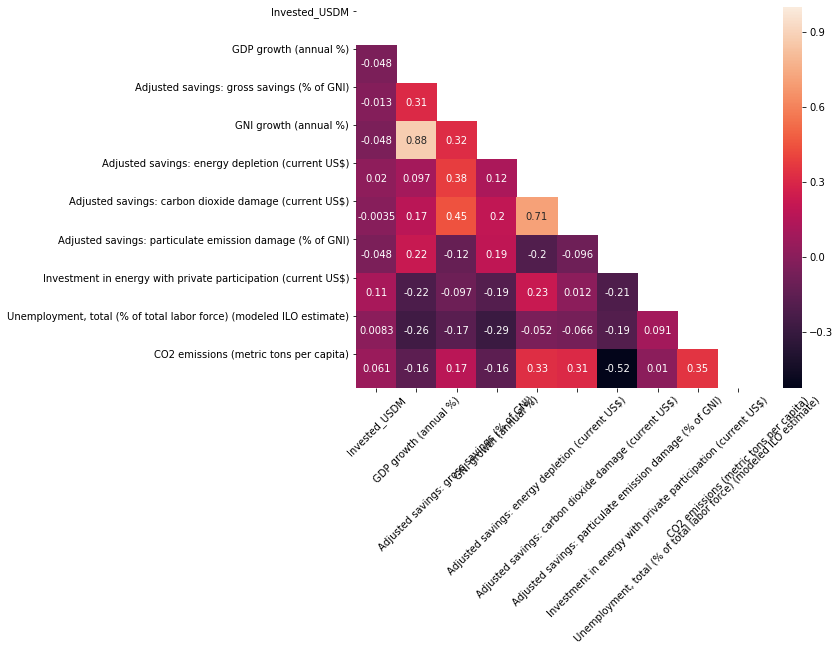

In [50]:
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(9, 7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(dfs.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
sns.heatmap(dfs.corr(), mask=mask, annot=True, ax=ax)
ax.set_yticks(np.arange(0, dfs.shape[1])+0.1)
ax.set_ylim([dfs.shape[1], 0])
plt.xticks(rotation=90)
plt.show()

#fig.savefig('Eng_correlations.pdf', bbox_inches='tight')

## Touting NLP: 

In [62]:
#Dummify Technology & Asset Class: 

df1.Technology.value_counts()
#*^* dummify technology? 

df1_dum = pd.get_dummies(df1, df1['Project'], drop_first = True)
df1_dum
                                  
#Returning to DF1 as DFs_pt only to study relation btw numerical values. 

Multiple renewables*      2741
Solar energy              1590
Renewable Hydropower      1084
Wind energy                857
Bioenergy                  634
Geothermal energy          206
Other renewable energy      56
Marine energy               10
Name: Technology, dtype: int64

In [65]:
# Let's use the CountVectorizer to count words for us
cvec = CountVectorizer(strip_accents='unicode', ngram_range=(1, 1))
X_all = cvec.fit_transform(df1.Project)
columns = cvec.get_feature_names()

# note this is a large sparse matrix.
#    - rows are tweets, columns are words
X_all

<7178x6579 sparse matrix of type '<class 'numpy.int64'>'
	with 44917 stored elements in Compressed Sparse Row format>

In [66]:
# Converting X_all toarray() may use too much memory (particularly for 32-bit Python!)
print(X_all.shape)
print("Requires {} ints to do a .toarray()!".format(np.prod(X_all.shape))
      )
# x_df     =  pd.DataFrame(X_all.toarray(), columns=columns)
# tf_df    =  pd.DataFrame(x_df.sum(), columns=["freq"])
# tf_df.sort_values("freq", ascending=False).head(10)

(7178, 6579)
Requires 47224062 ints to do a .toarray()!


In [72]:
def get_freq_words(sparse_counts, columns):

    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting

    word_counts = np.ravel(X_all.sum(axis=0))
    freq_words = pd.Series(
        word_counts, index=columns).sort_values(ascending=False)

    return freq_words


freq_words = get_freq_words(X_all, columns)
freq_words[:20]

adjusted savings                        4
growth annual                           2
unemployment total                      1
energy private                          1
emission damage                         1
emission damage gni                     1
emissions metric                        1
emissions metric tons                   1
emissions metric tons capita            1
energy depletion                        1
energy depletion current                1
energy private participation            1
dioxide damage                          1
energy private participation current    1
force modeled                           1
force modeled ilo                       1
force modeled ilo estimate              1
gdp growth                              1
gdp growth annual                       1
gni growth                              1
dtype: int64

In [74]:
cvec = CountVectorizer(strip_accents='unicode',
                       stop_words="english", 
                       ngram_range=(1, 1))

X_all = cvec.fit_transform(df1.Project)
columns = cvec.get_feature_names()

freq_words = get_freq_words(X_all, columns)

print(freq_words[:20])
#fig, ax = hist_counts(freq_words, density=False)

energy         1835
project        1331
solar           855
renewable       794
power           735
wind            588
activities      479
aggregated      472
development     463
tc              454
hydropower      404
rural           304
plant           277
ii              259
study           249
program         216
generation      215
hydro           202
sustainable     195
support         187
dtype: int64


In [75]:
#Testing with n-grams(2,4)
cvec = CountVectorizer(stop_words="english", ngram_range=(2, 4))
X_all = cvec.fit_transform(df1.Project)
columns = cvec.get_feature_names()

freq_words = get_freq_words(X_all, columns)
freq_words[:75]

renewable energy                592
tc aggregated                   454
tc aggregated activities        454
aggregated activities           454
wind project                    249
                               ... 
production energie               31
energie sources                  31
renewable energy development     31
power station                    31
waste energy                     31
Length: 75, dtype: int64

In [78]:
freq_words[:20]

renewable energy            592
tc aggregated               454
tc aggregated activities    454
aggregated activities       454
wind project                249
solar energy                203
hydropower project          160
energy efficiency           150
feasibility study           149
power plant                 133
solar power                 123
multiple renewables         122
renewable energies          112
clean energy                 95
wind power                   94
power project                89
hydro power                  89
rural electrification        76
energy generation            75
sustainable energy           74
dtype: int64

In [79]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['tc']

In [81]:
# These look pretty clean for a first step in anlaysis
cvec = CountVectorizer(stop_words=stop, lowercase=True,
                       strip_accents="unicode", ngram_range=(2, 4))
X_all = cvec.fit_transform(df1.Project)
columns = cvec.get_feature_names()

freq_words = get_freq_words(X_all, columns)
freq_words[:20]

renewable energy         592
aggregated activities    454
wind project             249
solar energy             203
hydropower project       160
energy efficiency        150
feasibility study        149
power plant              133
solar power              123
multiple renewables      122
renewable energies       112
clean energy              95
wind power                94
power project             89
hydro power               89
rural electrification     76
energy generation         75
small hydropower          74
sustainable energy        74
wind farm                 65
dtype: int64

In [85]:
#vec_project = TfidfTransformer()
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X_all)
Pj_tfidf= tfidf_transformer.transform(X_all)


In [88]:
type(Pj_tfidf)

scipy.sparse.csr.csr_matrix

In [86]:
# print idf values
project_idf = pd.DataFrame(tfidf_transformer.idf_, index=cvec.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
project_idf.sort_values(by=['idf_weights'])

,idf_weights
renewable energy,3.505596
aggregated activities,3.758618
wind project,4.357454
solar energy,4.565709
hydropower project,4.797511
...,...
formerly mff ii energy,9.185768
formerly pal,9.185768
formerly rural,9.185768
former pe p004206,9.185768


In [3]:
#Add above column to df1 in place of Project? Or need to Transpose it & stack? 
#1st transform to sparse matrix :
#Add 2 below to final DF:
import scipy as sc
X_csr = sc.sparse.csr_matrix(Pf_dum.values)
X_full = sc.sparse.hstack([X_csr, Pj_tfidf])


AttributeError: module 'scipy' has no attribute 'sparse'

In [42]:
#What's the impact on investment from Covid: 
#Look at differences of GDP from year/year: 
#For e country's GDP:how much does it change fm yr/yr: increase vs decrease
#How does that impact received investment? M+ v l- 
#Project : 
#What's expected GDP for this year: estimate of dtpt as additional obsvtn in dataset: 
#For 2019/following year. 

Model could assess whether GDP is x % lower/upper than last year : 
    model predicts impact> investment received by country
Fit on features (U r, GDP, GNI, Adjusted)

SyntaxError: invalid syntax (<ipython-input-42-354ebfd769e8>, line 9)

In [ ]:
#What's the impact on investment from Covid: 
#Look at differences of GDP from year/year: 
#For e country's GDP:how much does it change fm yr/yr: increase vs decrease
#How does that impact received investment? M+ v l- 
#Project : 
#What's expected GDP for this year: estimate of dtpt as additional obsvtn in dataset: 
#For 2019/following year. 

Model could assess whether GDP is x % lower/upper than last year : 
    model predicts impact> investment received by country
Fit on features (U r, GDP, GNI, Adjusted)
#Clustering : b> tiers of total investment
#Leave residuals
#Pipeline & GS all Regression models
#Keep tabs on narrative, on critical insight/commentary & Metadata
#Add an extra column of GDP & GNI growth direction
#Use this as column to help predict investment received in future

#Using LogReg: when split Train/test: Use 

#Method/pattern will have changed btw early 2000s/2017 
*^* maybe G+ to try to split train/test chronoligcally 
#Keep year column 

In [ ]:
#Keep tabs on narrative, on critical insight/commentary & Metadata
#Add an extra column of GDP & GNI growth direction
#Use this as column to help predict investment received in future

#Using LogReg: when split Train/test: Use 

#Method/pattern will have changed btw early 2000s/2017 
*^* maybe G+ to try to split train/test chronoligcally 
#Keep year column 